In [1]:
import os # 그림파일 그릴 때 사용
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # plot 띄우는 데 사용
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning) # 경고 제거

sns.set_style('whitegrid')

In [2]:
# 띄운 그래프 이미지로 저장
def save_figure(fig_id):
  path = os.path.join('icpbl_images_' + fig_id + '.png')
  plt.savefig(path, dpi = 300, format = 'png')

In [3]:
# 데이터 불러오기
normal = pd.read_csv("normal.csv")
abnormal = pd.read_csv("abnormal.csv")

In [4]:
# 데이터 병합
motor = pd.concat([normal, abnormal], ignore_index=True)
motor.head()

,class,motor_id,peak,trough,mean,RMS,Crest_Factor
0,0,1,0.54586,-0.64399,0.212815,0.259152,2.106329
1,0,1,0.43071,-0.49046,0.201589,0.236248,1.823125
2,0,1,0.58424,-0.68237,0.224045,0.266597,2.191469
3,0,1,0.54586,-0.64399,0.215331,0.262858,2.076637
4,0,1,0.58405,-0.68256,0.224041,0.266596,2.190764


In [5]:
from sklearn.preprocessing import StandardScaler

# 데이터 분리
X = motor.drop(["class", "motor_id"], axis=1)
y = motor["class"]

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 모터 ID를 기준으로 훈련 데이터와 테스트 데이터 나누기
X_train = X[motor['motor_id'].between(1, 36)]
y_train = y[motor['motor_id'].between(1, 36)]
X_test = X[motor['motor_id'].between(37, 48)]
y_test = y[motor['motor_id'].between(37, 48)]

In [7]:
# 특정 피처 선택
selected_features = ["mean", "RMS"]
X_selected = X[selected_features]

In [10]:
from sklearn.svm import SVC
# 데이터 정규화
X_selected_scaled = scaler.fit_transform(X_selected)

# SVM 모델 초기화
fixed_svm_clf = SVC(C=300, gamma=0.1, kernel='rbf', probability=True)

# SVM 모델 학습
fixed_svm_clf.fit(X_selected_scaled, y)

SVC(C=300, gamma=0.1, probability=True)

In [11]:
# 결정 경계 그리는 함수 정의
from matplotlib.colors import ListedColormap

def plot_decision_regions_2d(X, y, classifier, feature_indices=(0, 1), resolution=0.02):
    """
    X: 특성 데이터
    y: 레이블 데이터
    classifier: 학습된 분류기
    feature_indices: 사용할 특성의 인덱스 튜플
    resolution: 등고선 해상도
    """
    # 사용할 특성 선택
    X_subset = X[:, feature_indices]

    # 마커 및 컬러맵 설정
    markers = ('s', 'p', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 그리기
    x1_min, x1_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    x2_min, x2_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X_subset[y == c1, 0],
                    y=X_subset[y == c1, 1],
                    alpha=0.8,
                    c=colors[idx],
                    label=c1,
                    edgecolor='black')

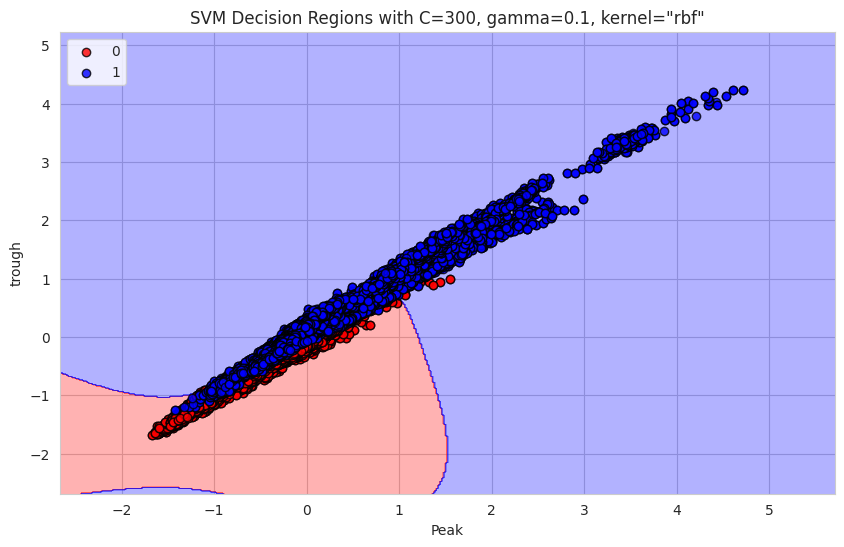

<Figure size 640x480 with 0 Axes>

In [13]:
# 결정 경계 시각화
plt.figure(figsize=(10, 6))
plot_decision_regions_2d(X_selected_scaled, y, classifier=fixed_svm_clf, feature_indices=(0, 1))
plt.title('SVM Decision Regions with C=300, gamma=0.1, kernel="rbf"')
plt.xlabel('mean')
plt.ylabel('RMS')
plt.legend(loc='upper left')
plt.show()

save_figure('Peak&trough')

In [21]:
# 특정 피처 선택
selected_features = ["RMS", "trough"]
X_selected = X[selected_features]

# 데이터 정규화
X_selected_scaled = scaler.fit_transform(X_selected)

# SVM 모델 초기화
fixed_svm_clf = SVC(C=300, gamma=0.1, kernel='rbf', probability=True)

# SVM 모델 학습
fixed_svm_clf.fit(X_selected_scaled, y)

SVC(C=300, gamma=0.1, probability=True)

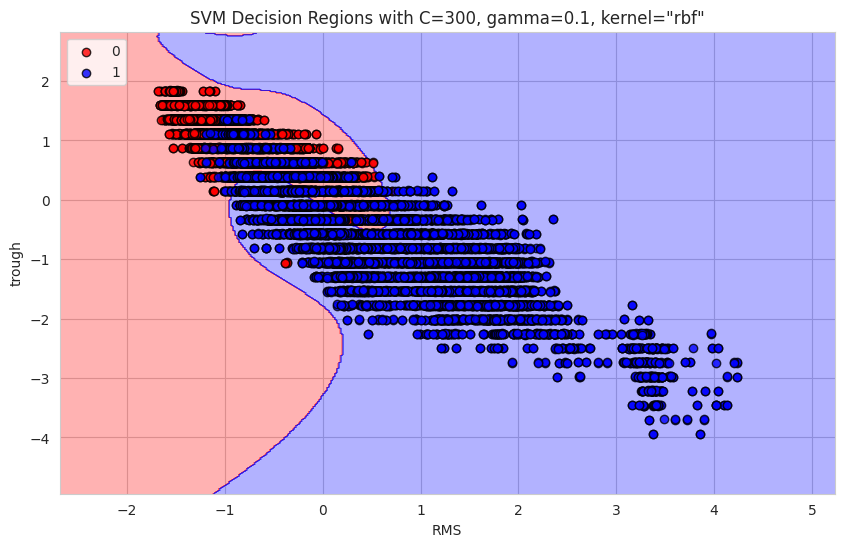

In [17]:
# 결정 경계 시각화
plt.figure(figsize=(10, 6))
plot_decision_regions_2d(X_selected_scaled, y, classifier=fixed_svm_clf, feature_indices=(0, 1))
plt.title('SVM Decision Regions with C=300, gamma=0.1, kernel="rbf"')
plt.xlabel('RMS')
plt.ylabel('trough')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 특정 피처 선택
selected_features = ["trough", "peak"]
X_selected = X[selected_features]

# 데이터 정규화
X_selected_scaled = scaler.fit_transform(X_selected)

# SVM 모델 초기화
fixed_svm_clf = SVC(C=300, gamma=0.1, kernel='rbf', probability=True)

# SVM 모델 학습
fixed_svm_clf.fit(X_selected_scaled, y)

SVC(C=300, gamma=0.1, probability=True)

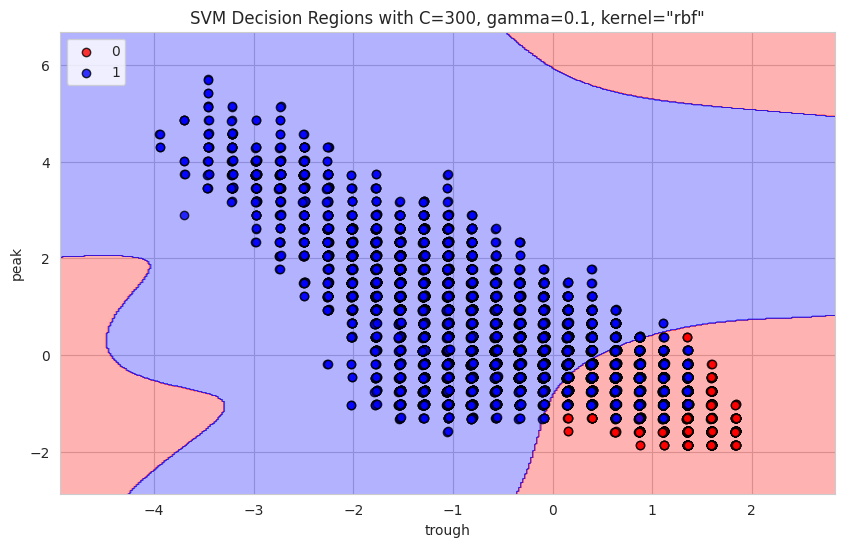

In [ ]:
# 결정 경계 시각화
plt.figure(figsize=(10, 6))
plot_decision_regions_2d(X_selected_scaled, y, classifier=fixed_svm_clf, feature_indices=(0, 1))
plt.title('SVM Decision Regions with C=300, gamma=0.1, kernel="rbf"')
plt.xlabel('trough')
plt.ylabel('peak')
plt.legend(loc='upper left')
plt.show()

In [27]:
# 특정 피처 선택
selected_features = ["RMS", "peak"]
X_selected = X[selected_features]

# 데이터 정규화
X_selected_scaled = scaler.fit_transform(X_selected)

# SVM 모델 초기화
fixed_svm_clf = SVC(C=300, gamma=0.1, kernel='rbf', probability=True)

# SVM 모델 학습
fixed_svm_clf.fit(X_selected_scaled, y)

SVC(C=300, gamma=0.1, probability=True)

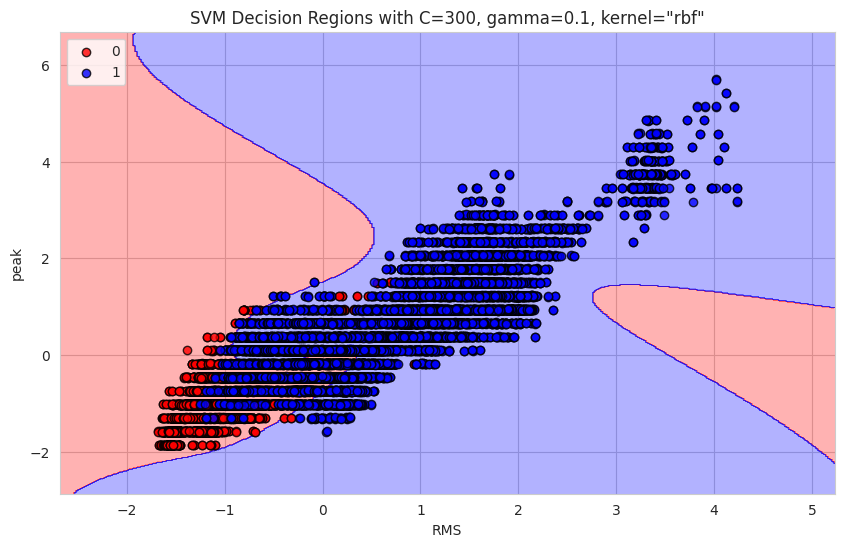

In [28]:
# 결정 경계 시각화
plt.figure(figsize=(10, 6))
plot_decision_regions_2d(X_selected_scaled, y, classifier=fixed_svm_clf, feature_indices=(0, 1))
plt.title('SVM Decision Regions with C=300, gamma=0.1, kernel="rbf"')
plt.xlabel('RMS')
plt.ylabel('peak')
plt.legend(loc='upper left')
plt.show()